In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd

In [2]:
loss = pd.read_csv('checkpoints/vae_12_19_2/loss.csv', delimiter=',')

In [5]:
loss[loss['epoch']==0].mean()

epoch                0.000000
iters             4195.000000
mse               -329.252485
kl                  26.493485
cycle             5092.853265
total             -302.759001
iter_time            6.046806
iter_data_time       0.095760
dtype: float64

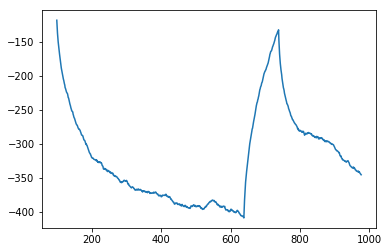

In [142]:
loss['total'].tail(5000).rolling(window=100).mean().plot()

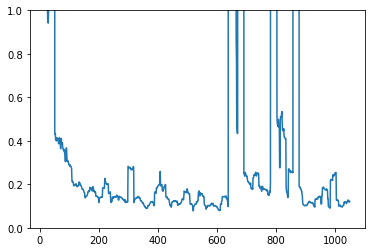

In [10]:
loss['cycle'].tail(5000).rolling(window=20).mean().plot(ylim=[0,1])

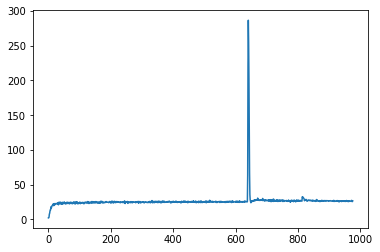

In [144]:
loss['kl'].plot()